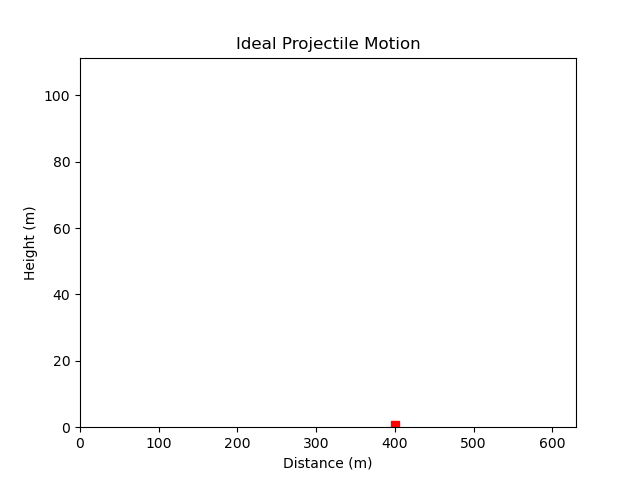

In [4]:
# projectile_motion.ipynb
# Cell 1

%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.animation import FuncAnimation
from matplotlib.patches import Rectangle


def plot(ax):
    global xa, ya, line

    range = 400  # m
    theta = np.radians(45)  # 45 degree launch angle
    g = 9.81  # m/s^2

    # Required initial velocity (m/s)
    #v0 = np.sqrt(range * g / np.sin(2 * theta))
    v0 = 45

    xa = np.linspace(0, 600, 200)
    ya = np.tan(theta) * xa - (g / (2 * v0**2 * np.cos(theta) ** 2)) * xa**2

    # Pre-computing the line to then reveal in our animation
    # This syntax returns all elements but initially shows nothing
    (line,) = ax.plot(xa, ya, linestyle="None")

    ax.set_title("Ideal Projectile Motion")
    ax.set_xlabel("Distance (m)")
    ax.set_ylabel("Height (m)")
    ax.set_ylim(bottom=0)
    ax.set_xlim(left=0)

    # Graphing a landing pad
    ax.add_patch(Rectangle((395, 0), 10, 2, color="red"))


# Same function as before
# Continue to animate until we reach the last value
def anim_frame_counter():
    global anim_continue
    anim_continue = True
    n = 0
    while anim_continue and n < len(xa):
        n += 1
        # Yield maintains the value of n
        yield n


def anim_draw_frame(n):
    global anim_continue
    # Array slicing to draw as many points as the frame count
    line.set_data(xa[:n], ya[:n])
    # Draws n number of points
    line.set_linestyle("-")

    if n > 0:
        if ya[n - 1] < 0:
            # Stop animation when ya goes below 0
            anim_continue = False
            # Adding a function to produce an output based on if he lands on the safe pad
            if xa[n - 1] < 398 or xa[n - 1] > 408:
                line.set_color("red")
                plt.text(xa[n - 1], 10, "Splat!", fontsize=14, color="red")
            else:
                line.set_color("green")
                plt.text(xa[n - 1], 10, "Safe landing!", fontsize=14, color="green")
    return line


def shoot_cannon():
    global anim

    plt.close("all")
    fig = plt.figure(label=" ")
    gs = fig.add_gridspec(1, 1)

    ax = fig.add_subplot(gs[0, 0])

    plot(ax)

    anim = FuncAnimation(
        ax.figure,
        anim_draw_frame,
        anim_frame_counter,
        interval=25,
        blit=True,
        repeat=False,
    )

    plt.show()


shoot_cannon()